In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical, plot_model
from keras import optimizers, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Using TensorFlow backend.
/Users/stephaniewalsh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/stephaniewalsh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/stephaniewalsh/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/stephaniewalsh/anacond

In [2]:
train = pd.read_csv('../titanic/cleaned_train.csv')

In [3]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [4]:
data = train.to_numpy()
X = data[:,1:]
y = data[:,0]
# y = to_categorical(y,num_classes=2)
X.shape

(889, 8)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state = 42)

In [6]:
model = Sequential()
model.add(Dense(32,input_dim=8,activation='sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 800 samples, validate on 89 samples
Epoch 1/50
800/800 [==============================] - 0s 258us/step - loss: 0.6427 - accuracy: 0.6162 - val_loss: 0.6310 - val_accuracy: 0.6292
Epoch 2/50
800/800 [==============================] - 0s 39us/step - loss: 0.6321 - accuracy: 0.6162 - val_loss: 0.6217 - val_accuracy: 0.6292
Epoch 3/50
800/800 [==============================] - 0s 45us/step - loss: 0.6268 - accuracy: 0.6263 - val_loss: 0.6146 - val_accuracy: 0.6742
Epoch 4/50
800/800 [==============================] - 0s 36us/step - loss: 0.6228 - accuracy: 0.6637 - val_loss: 0.6091 - val_accuracy: 0.6742
Epoch 5/50
800/800 [==============================] - 0s 39us/step - loss: 0.6197 - accuracy: 0.6837 - val_loss: 0.6045 - val_accuracy: 0.7079
Epoch 6/50
800/800 [==============================] - 0s 27us/step - loss: 0.6174 - accuracy: 0.6787 - val_loss: 0.6015 - val_accuracy: 0.6742
Epoch 7/50
800/800 [============================

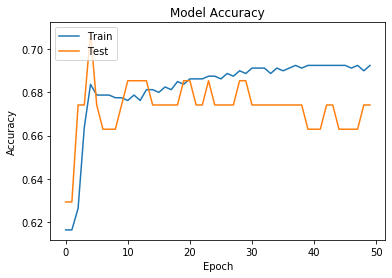

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [11]:
new_model = Sequential()
new_model.add(Dense(1,input_dim=8,activation='sigmoid'))

In [12]:
new_model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history2 = new_model.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/50
800/800 [==============================] - 0s 257us/step - loss: 2.2920 - accuracy: 0.5188 - val_loss: 0.9292 - val_accuracy: 0.6292
Epoch 2/50
800/800 [==============================] - 0s 33us/step - loss: 1.1431 - accuracy: 0.6500 - val_loss: 1.7775 - val_accuracy: 0.6292
Epoch 3/50
800/800 [==============================] - 0s 67us/step - loss: 1.6083 - accuracy: 0.5713 - val_loss: 1.4711 - val_accuracy: 0.6404
Epoch 4/50
800/800 [==============================] - 0s 51us/step - loss: 1.2598 - accuracy: 0.6162 - val_loss: 1.1745 - val_accuracy: 0.6404
Epoch 5/50
800/800 [==============================] - 0s 36us/step - loss: 1.2584 - accuracy: 0.6338 - val_loss: 1.6772 - val_accuracy: 0.3596
Epoch 6/50
800/800 [==============================] - 0s 24us/step - loss: 1.3615 - accuracy: 0.5925 - val_loss: 0.9979 - val_accuracy: 0.6517
Epoch 7/50
800/800 [==============================] - 0s 24us/step - loss: 1.0903 - accuracy: 0.

In [14]:
model_2 = Sequential()
model_2.add(Dense(32,input_dim=8,activation='sigmoid'))
model_2.add(Dense(32,activation='sigmoid'))
model_2.add(Dense(1,activation = 'sigmoid'))

In [15]:
model_2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model_3_history = model_2.fit(X, y, epochs=30, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/30
800/800 [==============================] - 0s 413us/step - loss: 0.8965 - accuracy: 0.3837 - val_loss: 0.8607 - val_accuracy: 0.3708
Epoch 2/30
800/800 [==============================] - 0s 36us/step - loss: 0.8235 - accuracy: 0.3837 - val_loss: 0.7970 - val_accuracy: 0.3708
Epoch 3/30
800/800 [==============================] - 0s 420us/step - loss: 0.7706 - accuracy: 0.3837 - val_loss: 0.7540 - val_accuracy: 0.3708
Epoch 4/30
800/800 [==============================] - 0s 36us/step - loss: 0.7354 - accuracy: 0.3837 - val_loss: 0.7255 - val_accuracy: 0.3708
Epoch 5/30
800/800 [==============================] - 0s 96us/step - loss: 0.7124 - accuracy: 0.3837 - val_loss: 0.7060 - val_accuracy: 0.3708
Epoch 6/30
800/800 [==============================] - 0s 40us/step - loss: 0.6968 - accuracy: 0.4300 - val_loss: 0.6923 - val_accuracy: 0.5730
Epoch 7/30
800/800 [==============================] - 0s 142us/step - loss: 0.6862 - accuracy: 

# Change Nodes to 256

In [17]:
model_256 = Sequential()
model_256.add(Dense(256,input_dim=8,activation='sigmoid'))
model_256.add(Dropout(0.2))
model_256.add(Dense(256,activation='sigmoid'))
model_256.add(Dropout(0.2))
model_256.add(Dense(1,activation = 'sigmoid'))

In [18]:
model_256.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model_256_history = model_256.fit(X, y, epochs=60, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/60
800/800 [==============================] - 0s 496us/step - loss: 0.7093 - accuracy: 0.5038 - val_loss: 0.6576 - val_accuracy: 0.6292
Epoch 2/60
800/800 [==============================] - 0s 354us/step - loss: 0.6789 - accuracy: 0.5925 - val_loss: 0.6534 - val_accuracy: 0.6292
Epoch 3/60
800/800 [==============================] - 0s 100us/step - loss: 0.6766 - accuracy: 0.5962 - val_loss: 0.6495 - val_accuracy: 0.6292
Epoch 4/60
800/800 [==============================] - 0s 65us/step - loss: 0.6831 - accuracy: 0.5875 - val_loss: 0.6465 - val_accuracy: 0.6292
Epoch 5/60
800/800 [==============================] - 0s 57us/step - loss: 0.6689 - accuracy: 0.6025 - val_loss: 0.6430 - val_accuracy: 0.6292
Epoch 6/60
800/800 [==============================] - 0s 61us/step - loss: 0.6673 - accuracy: 0.6225 - val_loss: 0.6397 - val_accuracy: 0.6292
Epoch 7/60
800/800 [==============================] - 0s 59us/step - loss: 0.6781 - accuracy: 

800/800 [==============================] - 0s 77us/step - loss: 0.6352 - accuracy: 0.6463 - val_loss: 0.5869 - val_accuracy: 0.6629
Epoch 58/60
800/800 [==============================] - 0s 53us/step - loss: 0.6309 - accuracy: 0.6625 - val_loss: 0.5867 - val_accuracy: 0.6742
Epoch 59/60
800/800 [==============================] - 0s 71us/step - loss: 0.6251 - accuracy: 0.6687 - val_loss: 0.5864 - val_accuracy: 0.6742
Epoch 60/60
800/800 [==============================] - 0s 48us/step - loss: 0.6294 - accuracy: 0.6625 - val_loss: 0.5872 - val_accuracy: 0.6742


In [20]:
relu_model = Sequential()
relu_model.add(Dense(256,input_dim=8,activation='relu'))
relu_model.add(Dropout(0.2))
relu_model.add(Dense(256,activation='relu'))
relu_model.add(Dropout(0.2))
relu_model.add(Dense(1,activation = 'sigmoid'))

In [21]:
relu_model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
relu_model_history = relu_model.fit(X, y, epochs=100, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/100
800/800 [==============================] - 0s 429us/step - loss: 1.4689 - accuracy: 0.5850 - val_loss: 0.6063 - val_accuracy: 0.7079
Epoch 2/100
800/800 [==============================] - 0s 37us/step - loss: 0.9568 - accuracy: 0.6300 - val_loss: 0.5830 - val_accuracy: 0.6854
Epoch 3/100
800/800 [==============================] - 0s 42us/step - loss: 0.9225 - accuracy: 0.6175 - val_loss: 0.6098 - val_accuracy: 0.6966
Epoch 4/100
800/800 [==============================] - 0s 36us/step - loss: 0.7493 - accuracy: 0.6550 - val_loss: 0.8203 - val_accuracy: 0.6292
Epoch 5/100
800/800 [==============================] - 0s 37us/step - loss: 0.9034 - accuracy: 0.6200 - val_loss: 0.6109 - val_accuracy: 0.6629
Epoch 6/100
800/800 [==============================] - 0s 37us/step - loss: 0.8086 - accuracy: 0.6200 - val_loss: 0.5742 - val_accuracy: 0.6966
Epoch 7/100
800/800 [==============================] - 0s 40us/step - loss: 0.7530 - accur

800/800 [==============================] - 0s 59us/step - loss: 0.6067 - accuracy: 0.6862 - val_loss: 0.5250 - val_accuracy: 0.7528
Epoch 58/100
800/800 [==============================] - 0s 47us/step - loss: 0.6117 - accuracy: 0.6787 - val_loss: 0.5292 - val_accuracy: 0.7753
Epoch 59/100
800/800 [==============================] - 0s 52us/step - loss: 0.6098 - accuracy: 0.6950 - val_loss: 0.5251 - val_accuracy: 0.7416
Epoch 60/100
800/800 [==============================] - 0s 38us/step - loss: 0.6228 - accuracy: 0.6750 - val_loss: 0.5218 - val_accuracy: 0.7640
Epoch 61/100
800/800 [==============================] - 0s 42us/step - loss: 0.6178 - accuracy: 0.6862 - val_loss: 0.5341 - val_accuracy: 0.7640
Epoch 62/100
800/800 [==============================] - 0s 37us/step - loss: 0.6030 - accuracy: 0.6913 - val_loss: 0.5273 - val_accuracy: 0.7303
Epoch 63/100
800/800 [==============================] - 0s 36us/step - loss: 0.6019 - accuracy: 0.6787 - val_loss: 0.5263 - val_accuracy: 0.752

In [23]:
relu_adam_model = Sequential()
relu_adam_model.add(Dense(256,input_dim=8,activation='relu'))
relu_adam_model.add(Dropout(0.2))
relu_adam_model.add(Dense(256,activation='relu'))
relu_adam_model.add(Dropout(0.2))
relu_adam_model.add(Dense(1,activation = 'sigmoid'))

In [24]:
relu_adam_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
relu_adam_model_history = relu_adam_model.fit(X, y, epochs=100, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/100
800/800 [==============================] - 0s 572us/step - loss: 1.1692 - accuracy: 0.6087 - val_loss: 0.6660 - val_accuracy: 0.6854
Epoch 2/100
800/800 [==============================] - 0s 57us/step - loss: 0.9480 - accuracy: 0.5825 - val_loss: 0.5624 - val_accuracy: 0.6966
Epoch 3/100
800/800 [==============================] - 0s 44us/step - loss: 0.9190 - accuracy: 0.6275 - val_loss: 0.5723 - val_accuracy: 0.6966
Epoch 4/100
800/800 [==============================] - 0s 42us/step - loss: 0.8742 - accuracy: 0.6737 - val_loss: 0.6151 - val_accuracy: 0.6629
Epoch 5/100
800/800 [==============================] - 0s 46us/step - loss: 0.7791 - accuracy: 0.6450 - val_loss: 0.5293 - val_accuracy: 0.7191
Epoch 6/100
800/800 [==============================] - 0s 48us/step - loss: 0.8088 - accuracy: 0.6350 - val_loss: 0.5272 - val_accuracy: 0.7079
Epoch 7/100
800/800 [==============================] - 0s 48us/step - loss: 0.6908 - accur

800/800 [==============================] - 0s 44us/step - loss: 0.5057 - accuracy: 0.7700 - val_loss: 0.4174 - val_accuracy: 0.8539
Epoch 58/100
800/800 [==============================] - 0s 41us/step - loss: 0.5098 - accuracy: 0.7812 - val_loss: 0.4062 - val_accuracy: 0.8315
Epoch 59/100
800/800 [==============================] - 0s 48us/step - loss: 0.4953 - accuracy: 0.7900 - val_loss: 0.4033 - val_accuracy: 0.8315
Epoch 60/100
800/800 [==============================] - 0s 42us/step - loss: 0.5071 - accuracy: 0.7663 - val_loss: 0.3992 - val_accuracy: 0.8315
Epoch 61/100
800/800 [==============================] - 0s 46us/step - loss: 0.5066 - accuracy: 0.7688 - val_loss: 0.4020 - val_accuracy: 0.8202
Epoch 62/100
800/800 [==============================] - 0s 48us/step - loss: 0.5164 - accuracy: 0.7675 - val_loss: 0.4026 - val_accuracy: 0.8202
Epoch 63/100
800/800 [==============================] - 0s 48us/step - loss: 0.4761 - accuracy: 0.7812 - val_loss: 0.4082 - val_accuracy: 0.831

# Best Accuracy so far

In [26]:
relu_adam_model_01 = Sequential()
relu_adam_model_01.add(Dense(256,input_dim=8,activation='relu'))
relu_adam_model_01.add(Dropout(0.2))
relu_adam_model_01.add(Dense(256,activation='relu'))
relu_adam_model_01.add(Dropout(0.2))
relu_adam_model_01.add(Dense(1,activation = 'sigmoid'))

In [27]:
adam = optimizers.Adam(learning_rate=0.01)

In [28]:
relu_adam_model_01.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
relu_adam_model_01_history = relu_adam_model_01.fit(X, y, epochs=50, batch_size=128, validation_split=0.1)

Train on 800 samples, validate on 89 samples
Epoch 1/50
800/800 [==============================] - 1s 959us/step - loss: 3.5405 - accuracy: 0.5612 - val_loss: 1.4692 - val_accuracy: 0.7191
Epoch 2/50
800/800 [==============================] - 0s 81us/step - loss: 1.7610 - accuracy: 0.6200 - val_loss: 0.7863 - val_accuracy: 0.6629
Epoch 3/50
800/800 [==============================] - 0s 136us/step - loss: 0.8551 - accuracy: 0.6612 - val_loss: 0.5968 - val_accuracy: 0.7416
Epoch 4/50
800/800 [==============================] - 0s 119us/step - loss: 0.6662 - accuracy: 0.6562 - val_loss: 0.5376 - val_accuracy: 0.6854
Epoch 5/50
800/800 [==============================] - 0s 105us/step - loss: 0.6484 - accuracy: 0.6800 - val_loss: 0.5435 - val_accuracy: 0.7303
Epoch 6/50
800/800 [==============================] - 0s 73us/step - loss: 0.6150 - accuracy: 0.6687 - val_loss: 0.5302 - val_accuracy: 0.7528
Epoch 7/50
800/800 [==============================] - 0s 78us/step - loss: 0.6011 - accuracy:

/Users/stephaniewalsh/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.166384). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


Epoch 14/50
800/800 [==============================] - 0s 46us/step - loss: 0.5756 - accuracy: 0.7100 - val_loss: 0.4580 - val_accuracy: 0.7753
Epoch 15/50
800/800 [==============================] - 0s 43us/step - loss: 0.5753 - accuracy: 0.7125 - val_loss: 0.4786 - val_accuracy: 0.7865
Epoch 16/50
800/800 [==============================] - 0s 40us/step - loss: 0.5474 - accuracy: 0.7250 - val_loss: 0.4326 - val_accuracy: 0.7753
Epoch 17/50
800/800 [==============================] - 0s 44us/step - loss: 0.5304 - accuracy: 0.7425 - val_loss: 0.4404 - val_accuracy: 0.7865
Epoch 18/50
800/800 [==============================] - 0s 64us/step - loss: 0.5213 - accuracy: 0.7450 - val_loss: 0.4223 - val_accuracy: 0.8202
Epoch 19/50
800/800 [==============================] - 0s 48us/step - loss: 0.5206 - accuracy: 0.7600 - val_loss: 0.4318 - val_accuracy: 0.7865
Epoch 20/50
800/800 [==============================] - 0s 42us/step - loss: 0.5154 - accuracy: 0.7650 - val_loss: 0.4352 - val_accuracy:

In [30]:
test_data = pd.read_csv('../titanic/cleaned_test.csv')
passengerID = test_data['PassengerId']
test_data.drop('PassengerId',axis = 1 , inplace=True)


In [31]:
predictions = relu_adam_model_01.predict(test_data) 
predictions

array([[1.01227462e-01],
       [2.68520713e-01],
       [6.74698055e-02],
       [9.37634408e-02],
       [4.10224140e-01],
       [1.18794948e-01],
       [4.70117658e-01],
       [1.78667933e-01],
       [4.92077380e-01],
       [1.35193467e-01],
       [9.32487547e-02],
       [2.23482609e-01],
       [7.13174522e-01],
       [1.12855762e-01],
       [6.52873755e-01],
       [6.09354317e-01],
       [1.36621743e-01],
       [1.12316132e-01],
       [3.75655442e-01],
       [3.10107172e-01],
       [3.33341360e-01],
       [3.90746236e-01],
       [6.64274573e-01],
       [4.25233066e-01],
       [6.99481964e-01],
       [7.70401657e-02],
       [6.62936091e-01],
       [1.11804247e-01],
       [2.99082220e-01],
       [1.41856700e-01],
       [1.53250217e-01],
       [1.41828984e-01],
       [3.73282909e-01],
       [4.09196556e-01],
       [3.54320168e-01],
       [1.14680141e-01],
       [4.39401269e-01],
       [4.68316168e-01],
       [9.46387649e-02],
       [4.11799610e-01],


In [32]:
predict_df = pd.DataFrame(data=predictions,columns=['Surv'])
predict_df.head(10)
# submission = pd.concat([passenferID,predict_df],axis=1)

,Surv
0,0.101227
1,0.268521
2,0.067470
3,0.093763
4,0.410224
5,0.118795
6,0.470118
7,0.178668
8,0.492077
9,0.135193


In [33]:
predict_df.loc[(predict_df['Surv']>0.6),'Survived'] = 1
predict_df.loc[(predict_df['Surv']<=0.6),'Survived'] = 0


In [34]:
survived = predict_df['Survived']
survived.head(40)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    1.0
23    0.0
24    1.0
25    0.0
26    1.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
Name: Survived, dtype: float64

In [35]:
submission = pd.concat([passengerID,survived],axis=1)
submission.astype('int32')
submission.to_csv("../submissions/NN_submission2.csv", index = False)

In [36]:
relu_adam_model_0001 = Sequential()
relu_adam_model_0001.add(Dense(256,input_dim=8,activation='relu'))
relu_adam_model_0001.add(Dropout(0.2))
relu_adam_model_0001.add(Dense(256,activation='relu'))
relu_adam_model_0001.add(Dropout(0.2))
relu_adam_model_0001.add(Dense(2,activation = 'softmax'))

In [37]:
adam_0001 = optimizers.Adam(learning_rate=0.0001)

In [38]:
relu_adam_model_0001.compile(optimizer=adam_0001,loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
relu_adam_model_0001_history = relu_adam_model_0001.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.1)

ValueError: Error when checking target: expected dense_21 to have shape (2,) but got array with shape (1,)